<a href="https://colab.research.google.com/github/aimami-art/YZTA-Basic_CNN/blob/main/YZTA_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10 # veri seti
from tensorflow.keras.utils import to_categorical # encoding
from tensorflow.keras.models import Sequential # sıralı model
from tensorflow.keras.layers import Conv2D, MaxPooling2D # feature extraction
from tensorflow.keras.layers import Flatten, Dense, Dropout # classification (NN)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator # data augmentation

from sklearn.metrics import classification_report

In [2]:
#load data

(X_train, y_train), (x_test, y_test) = cifar10.load_data()

<ipython-input-3-9cf7842998c5>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = class_labels[int(y_train[i])]


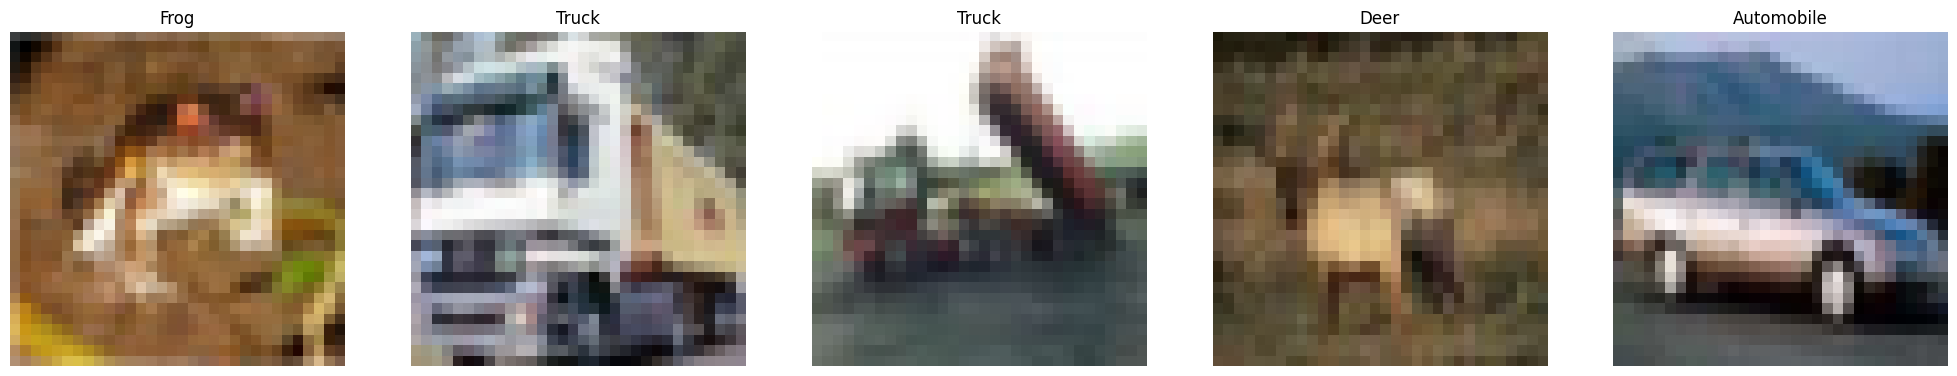

In [3]:
# görselleştirme

class_labels = class_labels = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

fig, axes = plt.subplots(1,5, figsize = (25,20))
for i in range(5):
  axes[i].imshow(X_train[i])
  label = class_labels[int(y_train[i])]
  axes[i].set_title(label)
  axes[i].axis("off")

In [4]:
# normalization

X_train = X_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [5]:
# one - hot encodeing
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# data augmentation

datagen = ImageDataGenerator(
    rotation_range = 20, # 20 derece kadar döndurme
    width_shift_range = 0.2, # goruntuyu yatayda %20 kaydırma
    height_shift_range = 0.2, # goruntuyu dikeyde %20 kaydırma
    shear_range = 0.2, # goruntuye zoom uygulama
    horizontal_flip = True, # goruntuyu yatayda ters çevirme

)

datagen.fit(X_train)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
# define model

model = Sequential()

# FEATURE EXTRACTION LAYER :
model.add(Conv2D(32, (3,3), padding= "same", activation="relu",input_shape = X_train.shape[1:]))
model.add(Conv2D(32, (3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding= "same", activation="relu"))
model.add(Conv2D(64, (3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# CLASSIFICATION LAYER :

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# model compile

model.compile(optimizer= RMSprop(learning_rate=0.0001), loss= "categorical_crossentropy", metrics= ["accuracy"])

In [10]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=512), epochs =40, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 331ms/step - accuracy: 0.1323 - loss: 2.2664 - val_accuracy: 0.2672 - val_loss: 2.0530
Epoch 2/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - accuracy: 0.2308 - loss: 2.0653 - val_accuracy: 0.2959 - val_loss: 1.9631
Epoch 3/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - accuracy: 0.2610 - loss: 2.0053 - val_accuracy: 0.3584 - val_loss: 1.8673
Epoch 4/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.2961 - loss: 1.9271 - val_accuracy: 0.3561 - val_loss: 1.8105
Epoch 5/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.3178 - loss: 1.8716 - val_accuracy: 0.4019 - val_loss: 1.7221
Epoch 6/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.3290 - loss: 1.8428 - val_accuracy: 0.4014 - val_loss: 1.6973
Epoch 7/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.3351 - loss: 1.8180 - val_accuracy: 0.3799 - val_loss: 1.7322
Epoch 8/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - accuracy: 0.3463 - loss: 1.7919 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

    Airplane       0.66      0.57      0.61      1000
  Automobile       0.54      0.81      0.65      1000
        Bird       0.56      0.28      0.38      1000
         Cat       0.51      0.21      0.29      1000
        Deer       0.57      0.30      0.39      1000
         Dog       0.57      0.39      0.46      1000
        Frog       0.42      0.84      0.56      1000
       Horse       0.57      0.62      0.59      1000
        Ship       0.67      0.68      0.68      1000
       Truck       0.49      0.69      0.57      1000

    accuracy                           0.54     10000
   macro avg       0.56      0.54      0.52     10000
weighted avg       0.56      0.54      0.52     10000



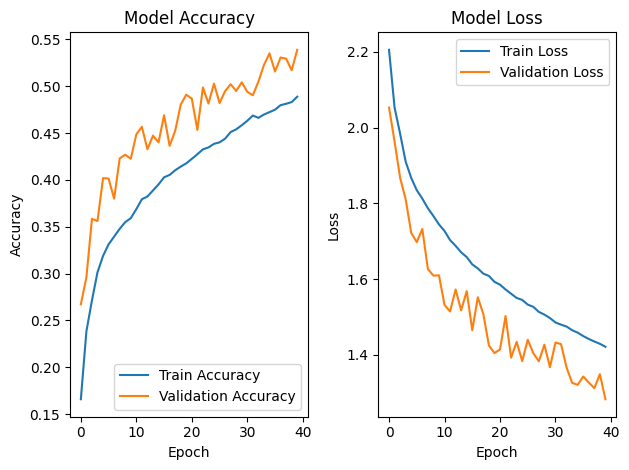

In [11]:
# modelin test seti üzerinden tahmini yap

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis= 1)

# classificatio nreport hesapla

report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

plt.figure()

# Accuracy grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
